## Regression vs. logistic regression approach to classification, part 1

In this lab, we will see that linear regression does not work on classification problems.



### A few imports

In [ ]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from ipywidgets import Output
from IPython.display import display
from sklearn.linear_model import LinearRegression


### Initialisations

In [2]:
# Initial data

x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])


In [3]:
# Calculates linear regression and returns prediction on [-10-10] interval

def draw_linear_regression(x,y,xmin,xmax):
    model = LinearRegression()
    model.fit(x.reshape(-1,1),y.reshape(-1,1))
    output=model.predict([[xmin],[xmax]])

    return np.hstack(([[xmin],[xmax]],output)),  ((0.5 - model.intercept_)/model.coef_)[0,0]



In [4]:
# Creating widget

# Create an output widget
out = Output()
display(out)
plt.ioff()

# Set up the plot
fig, ax = plt.subplots()
ax.set_title('Click to add points')
ax.set_xlim(-10, 10)
ax.set_ylim(-1, 2)
points, = ax.plot(x_train[y_train==1], y_train[y_train==1], 'ro')  # 'ro' means red color, circle markers
points2, = ax.plot(x_train[y_train==0], y_train[y_train==0], 'bx')  # 'bx' means blue color, cross markers
linedata,threshold = draw_linear_regression(x_train,y_train,-10,10)
lineout, = ax.plot(linedata[:,0], linedata[:,1],  'r')  
blues = ax.axvspan(-10,threshold,-2,2,color='b',alpha=0.5)
reds = ax.axvspan(threshold,10,-2,2,color='r',alpha=0.5)


ax.grid()


Output()

### Interaction with widget functions

In [5]:



# Define the click event handler
def onclick(event):
    if event.inaxes is not None:
        xdata_1 = points.get_xdata()
        ydata_1 = points.get_ydata()
        xdata_2 = points2.get_xdata()
        ydata_2 = points2.get_ydata()
        if event.ydata>0.5:
            xdata_1 = list(xdata_1) + [event.xdata]
            ydata_1 = list(ydata_1) + [1] 
        else:
            xdata_2 = list(xdata_2) + [event.xdata]
            ydata_2 = list(ydata_2) + [0] 
        points.set_data(xdata_1, ydata_1)
        points2.set_data(xdata_2, ydata_2)
        xdata=np.hstack((xdata_1,xdata_2))
        ydata=np.hstack((ydata_1,ydata_2))
        linedata,threshold = draw_linear_regression(xdata,ydata,-10,10)
        lineout.set_data(list(linedata[:,0]), list(linedata[:,1]))
        blues.set_bounds((-10,-2,threshold+10,4))
        reds.set_bounds((threshold,-2,10-threshold,4))
        with out:
            ax.figure.canvas.draw()

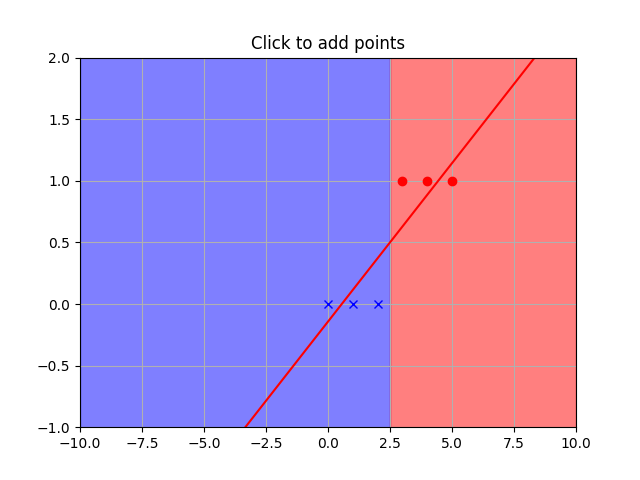

In [6]:


# Connect the event handler to the figure
cid = fig.canvas.mpl_connect('button_press_event', onclick)

# Display the plot
plt.show()



# Congratulations ! 
you understand now why regression does not work well on classification problems. We'll see more reasons in class now !